## Assignment 1: Machine Learning Methods

### \<zijie wang> \<a1984162>

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [ ]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

### 1. Read the dataset

In [150]:
# Reading the dataset into a DataFrame
data = pd.read_csv("ObesityDataSet.csv")

In [151]:
# Preview the first five rows of the dataset
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [152]:
# Check the number of rows and columns in the dataset
data.shape

(2111, 17)

In [153]:
# Display basic information about the dataset, including column types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [154]:
# Display all column names to understand available features
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### 2. Analyse and visualise the data

In [155]:
# Check for missing values in each column
# All columns have 0 missing values – the dataset is complete and requires no imputation
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [156]:
# Check how many duplicate rows are in the dataset
# The dataset contains 24 duplicate rows, each with 17 columns.
# These duplicates may introduce bias or redundancy in the analysis and modelling process.
dup_data = data[data.duplicated()]
print(dup_data.shape)

(24, 17)


In [157]:
# Drop 24 duplicate rows to ensure the dataset is clean and unbiased
data = data.drop_duplicates()

# Verify that no duplicate rows remain
dup_data = data[data.duplicated()]
print(dup_data.shape)

(0, 17)


In [158]:
# Calculate BMI (Body Mass Index) using the standard formula
data['BMI'] = data['Weight'] / (data['Height'])**2
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [159]:
# Define the list of categorical columns to inspect
cat_col = ['Gender', 'family_history_with_overweight', 'FAVC',
           'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Print the unique values in each categorical column
# This helps identify inconsistencies, unusual categories, or the need for encoding
for col in cat_col:
    print(f"{col}: {data[col].unique()}")

Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
# Generate descriptive statistics for all numerical columns
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035,29.765758
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153,8.024934
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000,24.368897
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866,28.896224
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000,36.095538
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


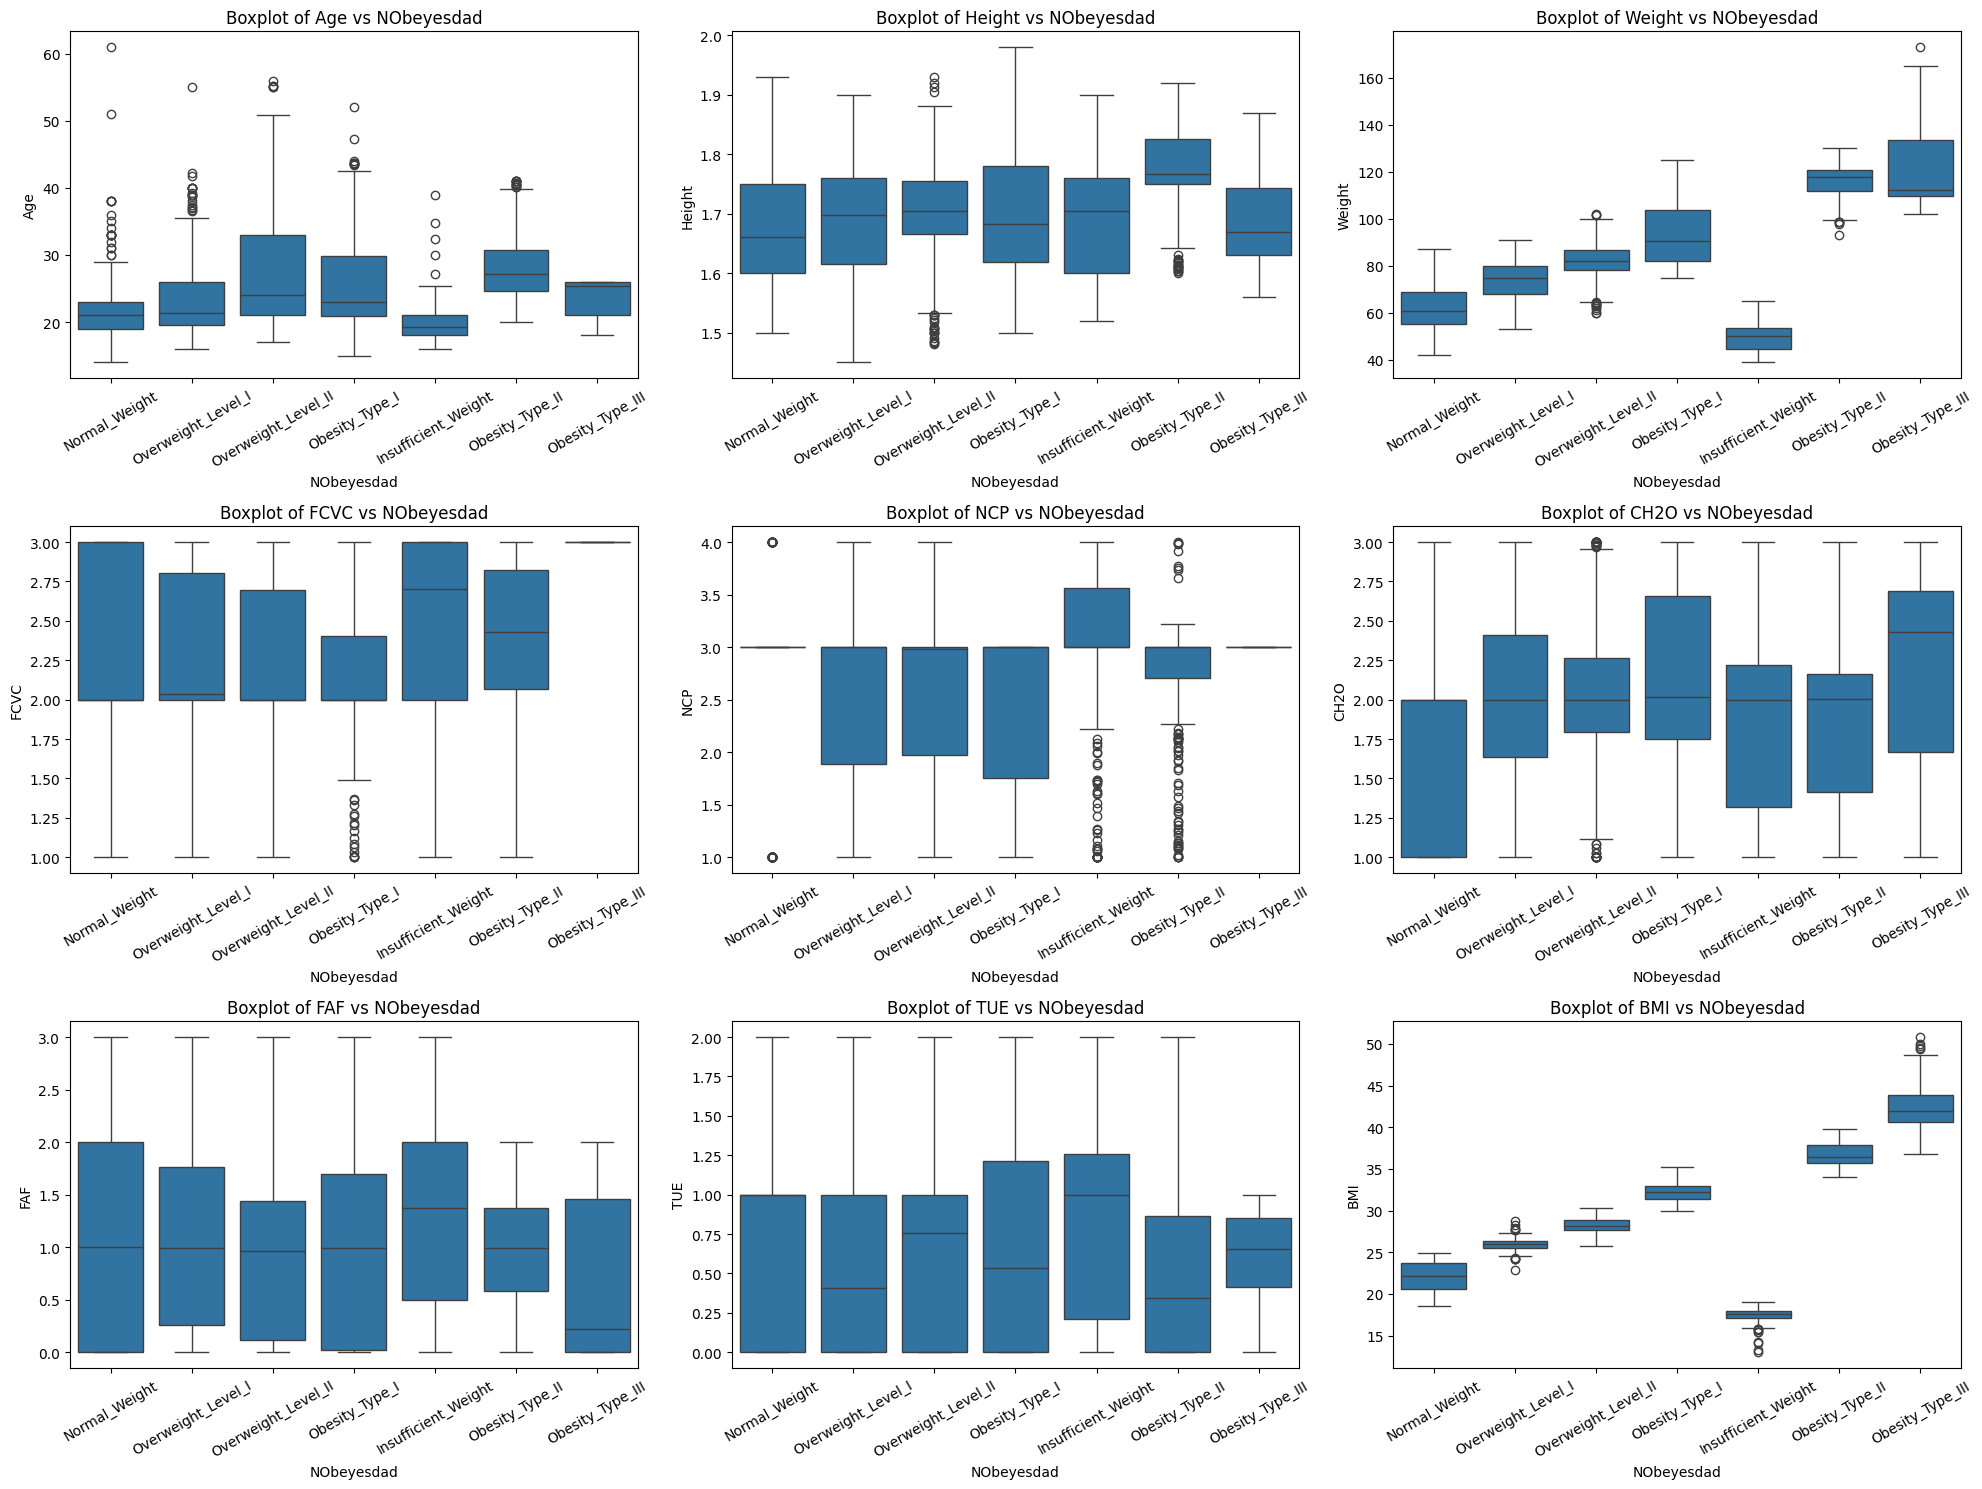

In [161]:
# Using BMI instead of both Height and Weight also improves model quality by reducing redundancy and potential multicollinearity
# BMI was selected as the preferred input feature for modelling, replacing the original Height and Weight variables
# From both boxplots and barplots, BMI shows the clearest upward trend across obesity classes
cols_to_plot = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i in range(len(cols_to_plot)):
    sns.boxplot(x='NObeyesdad', y=cols_to_plot[i], data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {cols_to_plot[i]} vs NObeyesdad')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

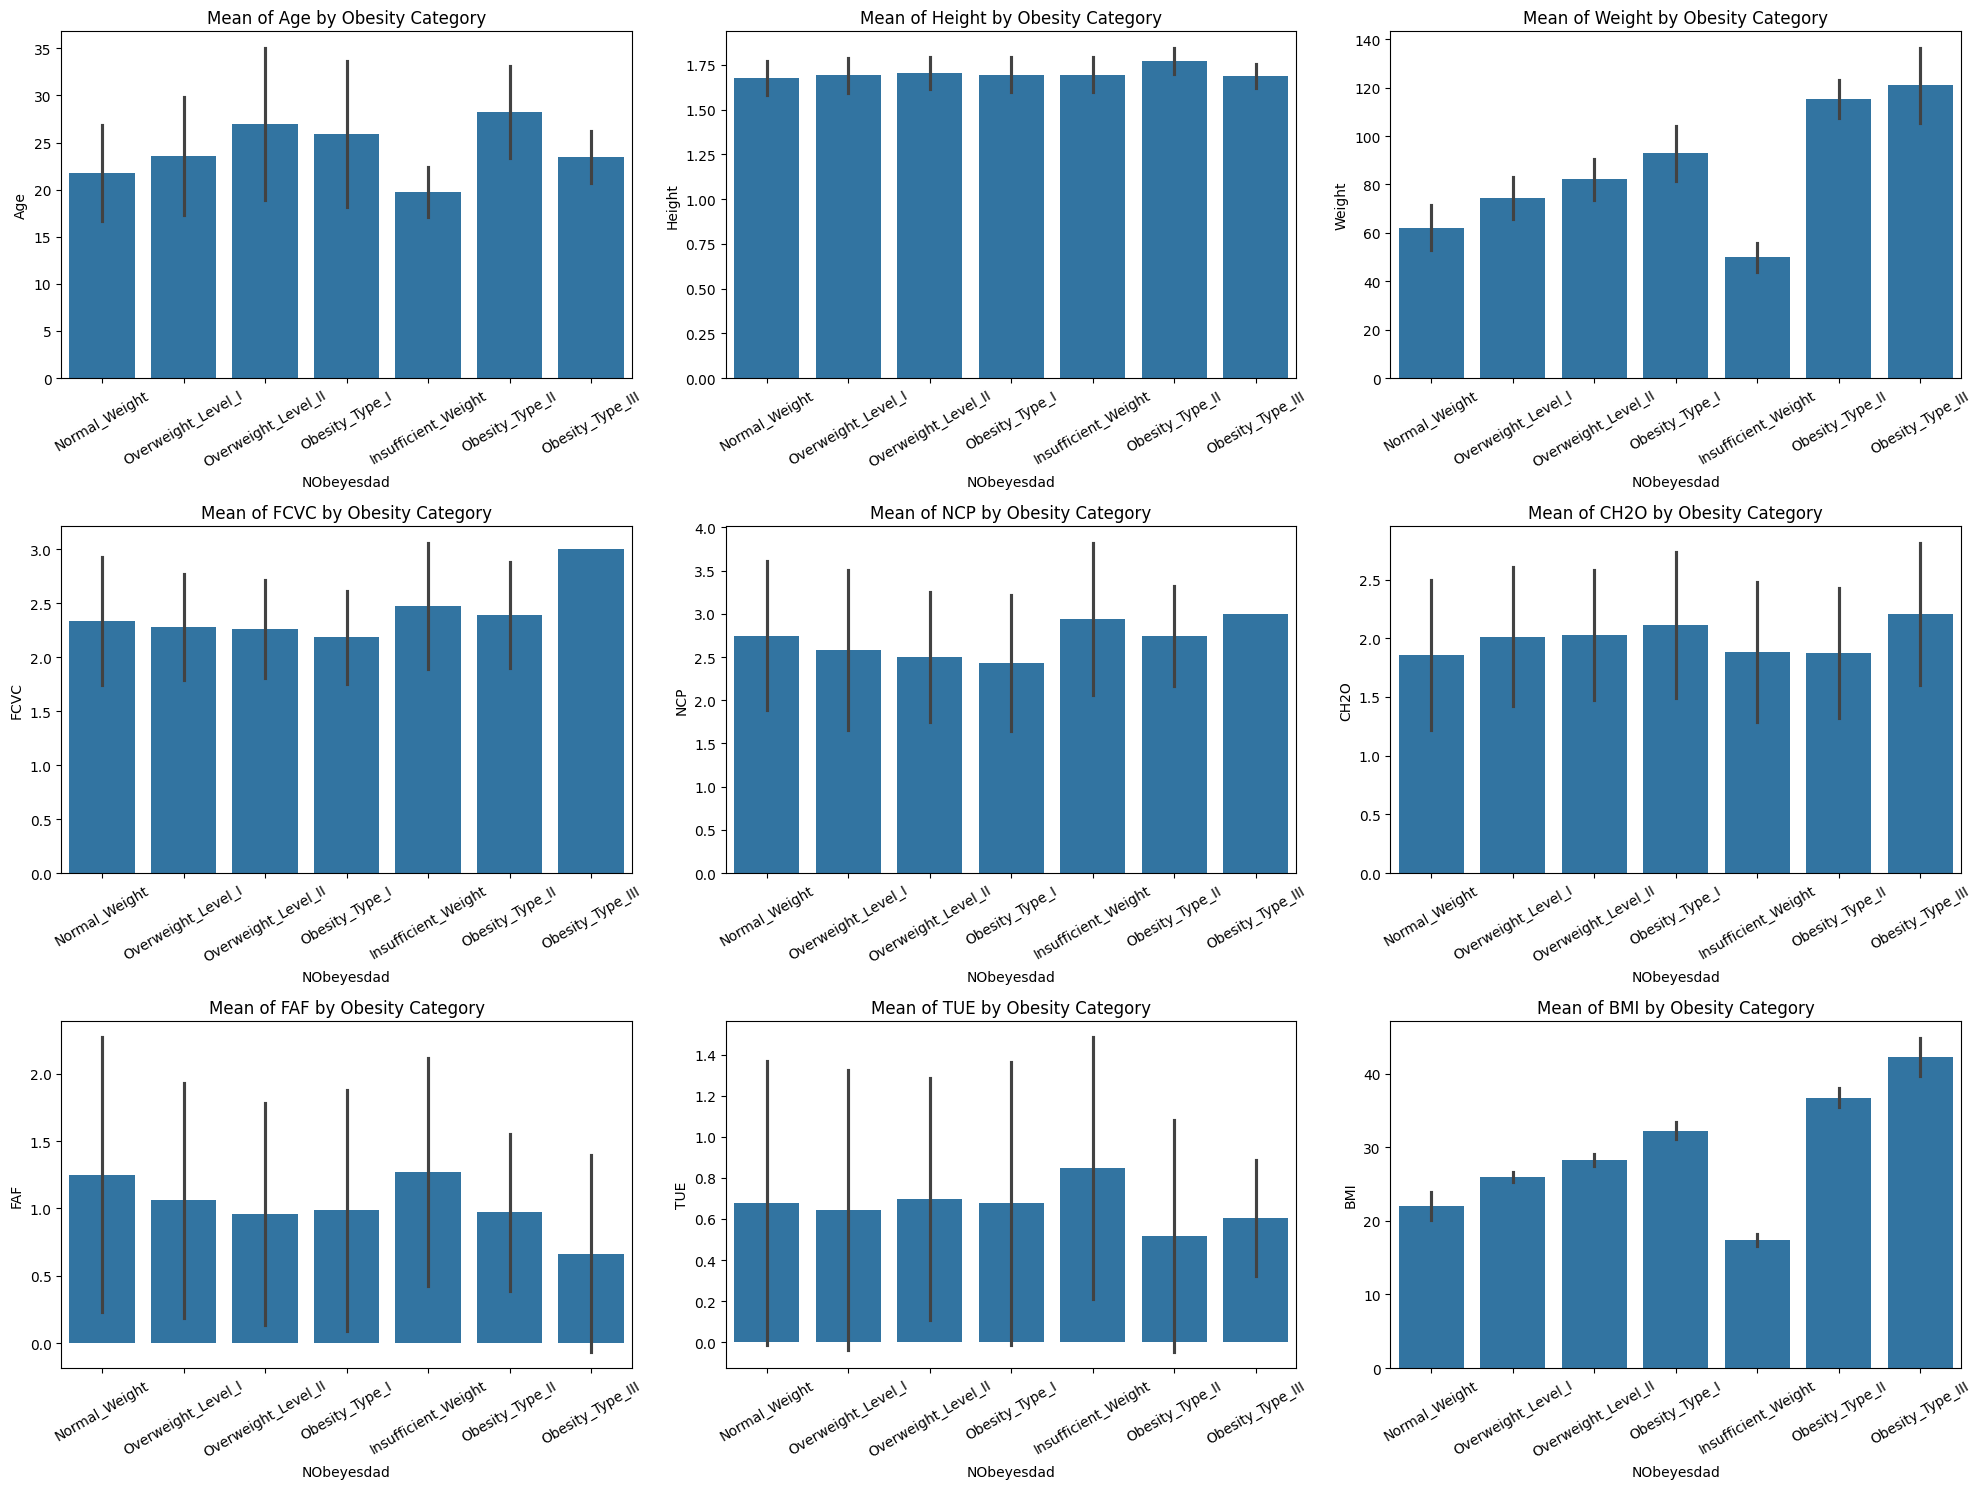

In [162]:
# These observations support using BMI instead of Height and Weight as a core predictor, and including behaviour-related features like FAF, CH2O, and TUE for model training
# BMI again shows a strong increasing trend, reinforcing its suitability over Height and Weight
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.barplot(x='NObeyesdad', y=col, data=data, errorbar='sd', ax=axes[i])
    axes[i].set_title(f'Mean of {col} by Obesity Category')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

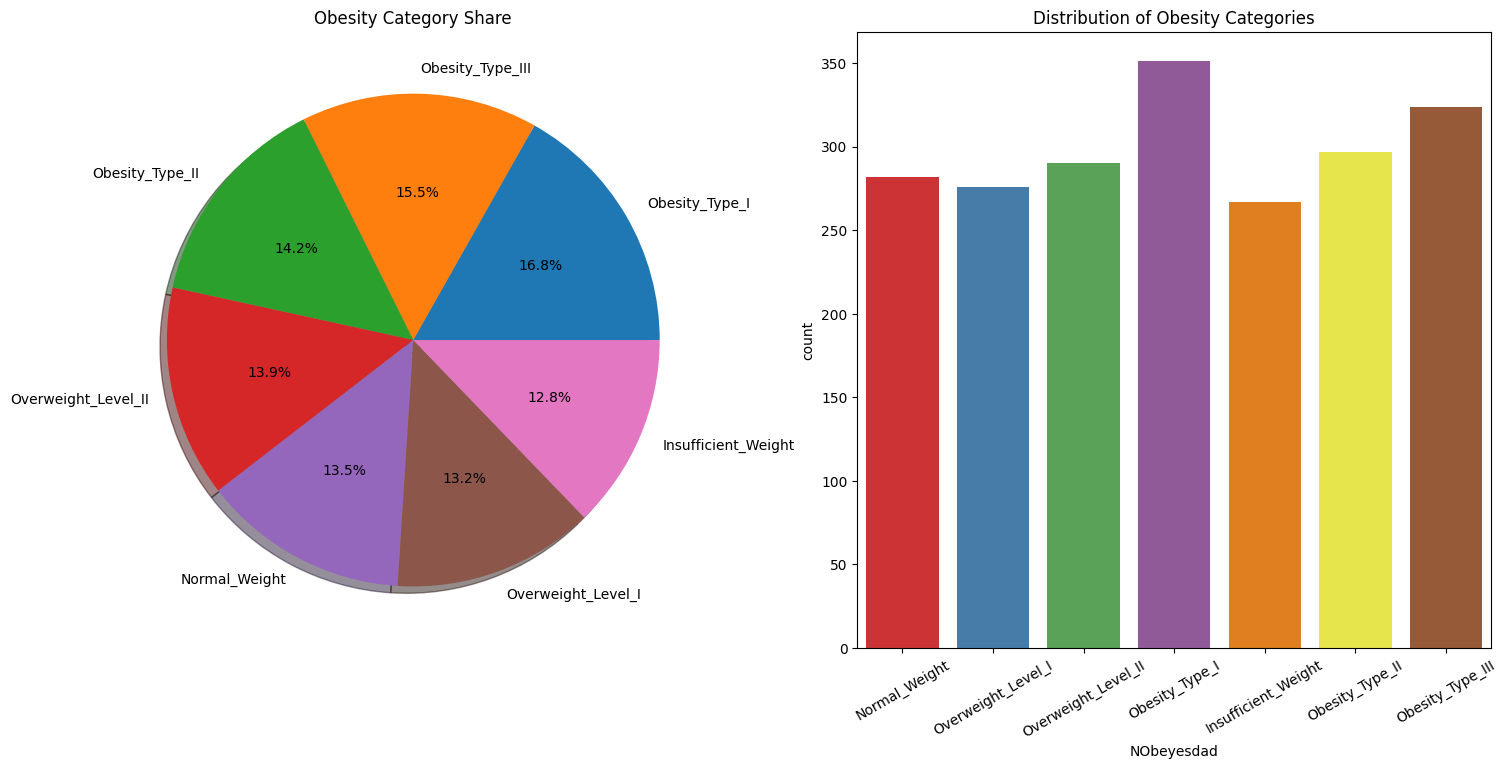

In [163]:
# Visualize the distribution of obesity categories
# The categories are fairly balanced (≈13–17%), so no class balancing is required
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart to show percentage distribution of obesity categories
ax[0] = data['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,ax=ax[0])
ax[0].set_title('Obesity Category Share')
ax[0].set_ylabel('')

# Bar chart to show the frequency of each category
ax[1] = sns.countplot(x='NObeyesdad', hue='NObeyesdad', data=data, palette='Set1', legend=False)
ax[1].set_title('Distribution of Obesity Categories')  
ax[1].tick_params(axis='x', rotation=30)

plt.show()

### 3. Organise the data for modelling

In [164]:
# Drop the original 'Weight' and 'Height' columns to reduce feature redundancy
data.drop(['Weight', 'Height'], axis=1, inplace=True)

# Display the first five rows to confirm that BMI was added and Weight/Height were removed
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [165]:
# Map the target variable NObeyesdad to numerical values:
# Insufficient Weight = 0, Normal Weight = 1, Overweight = 2, Obese = 3
# This simplified numeric mapping enables correlation analysis and supports ordinal-level modelling if required
data['NObeyesdad'] = data['NObeyesdad'].map({
    'Insufficient_Weight'  : 0,
    'Normal_Weight'        : 1,   
    'Overweight_Level_I'   : 2, 
    'Overweight_Level_II'  : 2,
    'Obesity_Type_I'       : 3,  
    'Obesity_Type_II'      : 3,
    'Obesity_Type_III'     : 3
})

In [166]:
# Encode categorical variables for analysis and modelling
# Ordinal variables (e.g. CAEC, CALC) are mapped according to their order of frequency
data['CAEC'] = data['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['CALC'] = data['CALC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))

# Binary variables (e.g. SMOKE, SCC) are mapped to 0/1
data['SMOKE'] = data['SMOKE'].apply(lambda x: ['no', 'yes'].index(x))
data['SCC'] = data['SCC'].apply(lambda x: ['no', 'yes'].index(x))

# Gender and other yes/no categorical variables
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female': 1})
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'no': 0, 'yes': 1})
data['FAVC'] = data['FAVC'].map({'no': 0, 'yes': 1})

# Transportation method (nominal) is mapped using arbitrary integers
data['MTRANS'] = data['MTRANS'].map({
    'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4
})

# Preview the updated dataset
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1,24.386526
1,1,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1,24.238227
2,0,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1,23.765432
3,0,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2,26.851852
4,0,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,2,28.342381


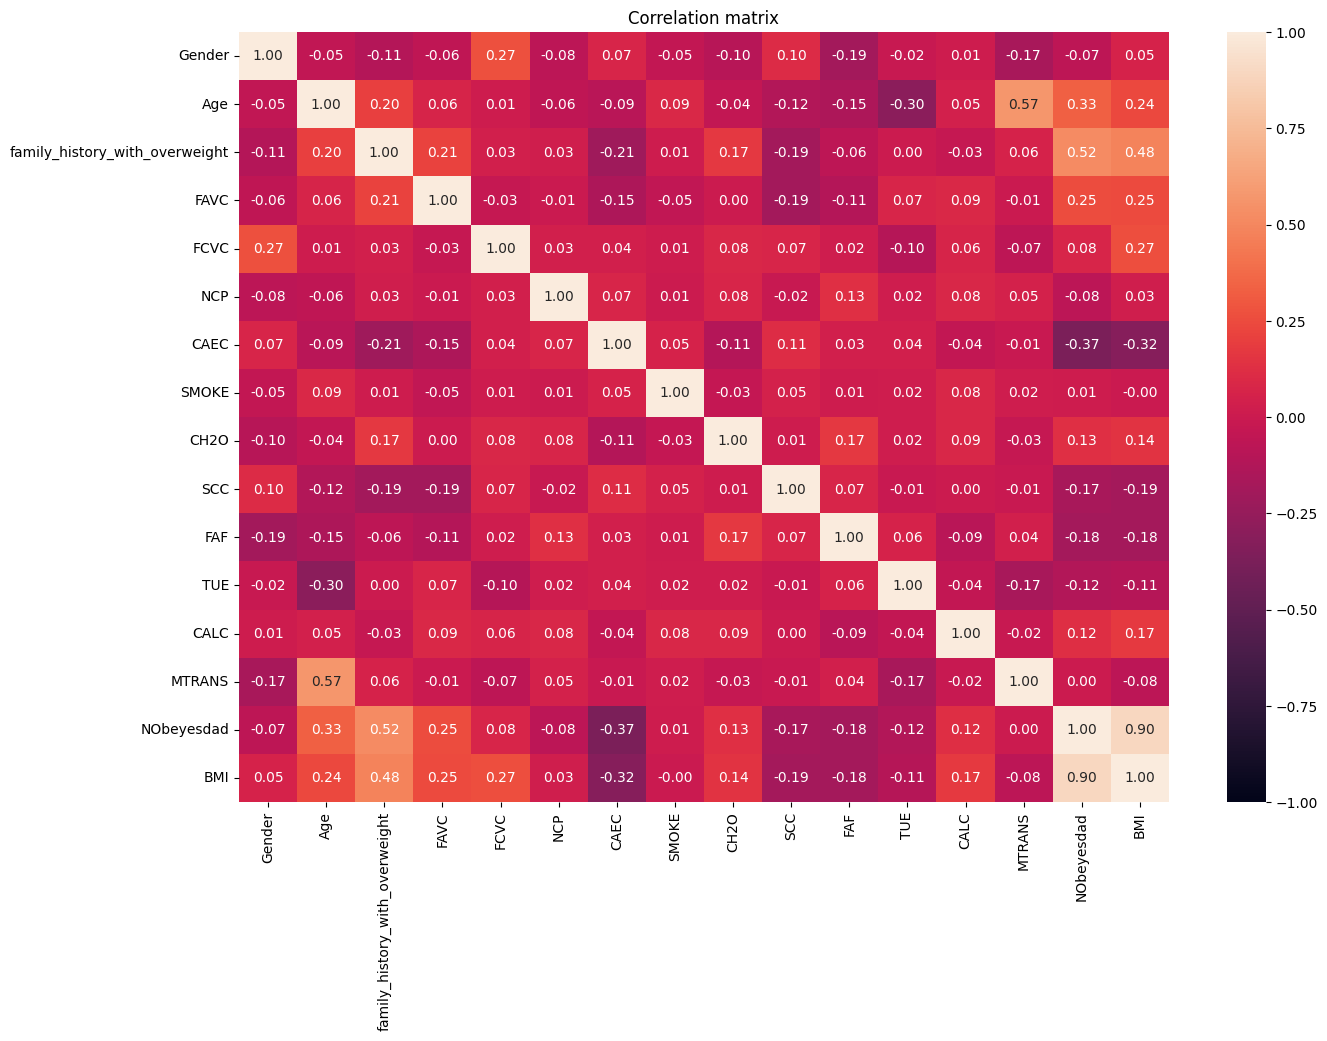

In [167]:
# Correlation heatmap
# The heatmap shows BMI is highly correlated with obesity 0.90
# followed by family_history_with_overweight and CAEC
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), vmax=1.0, vmin=-1.0, fmt='.2f', annot = True)

plt.title('Correlation matrix')
plt.show()

In [168]:
# Split the dataset into features and target
# X_res contains all features (excluding the target column 'NObeyesdad')
# y_res contains the target values (encoded obesity categories)
X_res = data.drop(columns='NObeyesdad')
y_res = data['NObeyesdad']

# Display the shapes of the full dataset, feature matrix, and target vector
print(data.shape)
print(X_res.shape)
print(y_res.shape)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=101, shuffle=True)

# Display the shapes of the split datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

(2087, 16)
(2087, 15)
(2087,)
X_train shape: (1669, 15)
X_test shape: (418, 15)
y_train shape: (1669,)
y_test shape: (418,)


In [169]:
# Standardize feature data to have mean = 0 and standard deviation = 1
# The scaler is fit only on the training set to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)    

In [170]:
# Apply PCA to reduce feature dimensionality while retaining 98% of variance
pca = PCA(n_components=0.98)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### 4. Implement prediction models

In [ ]:
# Initialize Logistic Regression models for original and PCA-reduced features with increased max iterations
lr_model = LogisticRegression(max_iter=5000)
lr_model_pca = LogisticRegression(max_iter=5000)

In [ ]:
# Initialize SVC models for original and PCA-reduced features with fixed random state
svc = SVC(random_state = 101)
svc_pca = SVC(random_state = 101)

In [ ]:
# Initialize a K-Nearest Neighbors (KNN) classifier for the original feature space
knn = KNeighborsClassifier()

# Define hyperparameter grid for model tuning
k_range = list(range(1, 10))
weights_options = ['uniform', 'distance']
k_grid = dict(n_neighbors=k_range, weights=weights_options)

# Set up GridSearchCV with 10-fold cross-validation using macro-averaged precision as the scoring metric
grid = GridSearchCV(knn, k_grid, cv=10, scoring='precision_macro')

# Initialize a second KNN classifier for the PCA-reduced feature space
knn_pca = KNeighborsClassifier()

# Define a separate hyperparameter grid for the PCA-transformed feature space
k_range_pca = list(range(1, 10))
weights_options_pca = ['uniform', 'distance']
k_grid_pca = dict(n_neighbors=k_range_pca, weights=weights_options_pca)

# Set up GridSearchCV for the PCA-based model using the same cross-validation and scoring strategy
grid_pca = GridSearchCV(knn_pca, k_grid_pca, cv=10, scoring='precision_macro')

In [ ]:
# Initialize GNB classifiers for original and PCA-reduced features
classifier = GaussianNB()
classifier_pca = GaussianNB()

### 5. Train prediction models

In [ ]:
# Fit Logistic Regression models on original and PCA-reduced training data
lr_model.fit(X_train_scaled, y_train)
lr_model_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
# Fit SVC models on original and PCA-reduced training data
svc.fit(X_train_scaled, y_train)
svc_pca.fit(X_train_pca, y_train)

SVC(random_state=101)

In [ ]:
# Fit GridSearchCV models on original and PCA-reduced training data
grid.fit(X_train_scaled, y_train)
grid_pca.fit(X_train_pca, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision_macro')

In [ ]:
# Fit Gaussian Naive Bayes models on original and PCA-reduced training data
classifier.fit(X_train_scaled, y_train)
classifier_pca.fit(X_train_pca, y_train)

GaussianNB()

### 6. Test prediction models and show results

In [ ]:
# The Logistic Regression model achieved a high training accuracy of 95.27% and an even better testing accuracy of 96.65%
# The small gap between training and test performance indicates excellent generalization and minimal overfitting
# Additionally, the PCA-transformed model maintained high performance, demonstrating that dimensionality reduction did not compromise predictive accuracy
lr_accuracies = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
lr_test_score = lr_model.score(X_test_scaled, y_test)

lr_accuracies_pca = cross_val_score(lr_model_pca, X_train_pca, y_train, cv=5)
lr_pca_test_score = lr_model_pca.score(X_test_pca, y_test)

# Print the average training accuracy from cross-validation and test accuracy for the model using original and PCA-reduced features
print("Logistic regression Default Train Score", np.mean(lr_accuracies))
print("Logistic regression Default Test Score", lr_test_score)

print("Logistic regression Default PCA Train Score", np.mean(lr_accuracies_pca))
print("Logistic regression Default PCA Test Score", lr_pca_test_score)

Logistic regression Default Train Score 0.9526604448760138
Logistic regression Default Test Score 0.9665071770334929
Logistic regression Default PCA Train Score 0.9526604448760138
Logistic regression Default PCA Test Score 0.9665071770334929


In [ ]:
# Cross-validation provides a more robust estimate of the model's ability to generalize to unseen data
# The Support Vector Classifier (SVC) is evaluated on both the original standardized features and PCA-reduced features
svc_accuracies = cross_val_score(svc, X_train_scaled, y_train, cv=5)
svc_test_score = svc.score(X_test_scaled, y_test)

svc_accuracies_pca = cross_val_score(svc_pca, X_train_pca, y_train, cv=5)
svc_pca_test_score = svc_pca.score(X_test_pca, y_test)

# Print the average training accuracy from cross-validation and the test accuracy using the original and PCA-reduced features
print("SVC Default Train Score", np.mean(svc_accuracies))
print("SVC Default Test Score:", svc_test_score)

print("SVC Default PCA Train Score", np.mean(svc_accuracies_pca))
print("SVC Default PCA Test Score:", svc_pca_test_score)

SVC Default Train Score 0.9113232993472515
SVC Default Test Score: 0.9401913875598086
SVC Default PCA Train Score 0.9113232993472515
SVC Default PCA Test Score: 0.9401913875598086


In [ ]:
# Predict on the training and test sets using the best KNN model identified by GridSearchCV wtih the original standardized features and PCA-reduced features
knn_train_pred = grid.best_estimator_.predict(X_train_scaled)
knn_pred = grid.best_estimator_.predict(X_test_scaled)

knn_train_pred_pca = grid_pca.best_estimator_.predict(X_train_pca)
knn_pred_pca = grid_pca.best_estimator_.predict(X_test_pca)

# Print accuracy scores for the KNN model trained on original and PCA-transformed features
print("KNN Training Accuracy:", accuracy_score(y_train, knn_train_pred))
print("KNN Test Set Accuracy:", accuracy_score(y_test, knn_pred))

print("KNN Training Accuracy PCA:", accuracy_score(y_train, knn_train_pred_pca))
print("KNN Test Set Accuracy PCA:", accuracy_score(y_test, knn_pred_pca))

KNN Training Accuracy: 1.0
KNN Test Set Accuracy: 0.8660287081339713
KNN Training Accuracy PCA: 1.0
KNN Test Set Accuracy PCA: 0.8660287081339713


In [ ]:
# Cross-validation is used to evaluate the model's ability to generalize to unseen data and to detect potential overfitting
# The Gaussian Naive Bayes (GNB) classifier is evaluated on both the original standardized features and PCA-reduced features
gnb_accuracies = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
gnb_test_score = classifier.score(X_test_scaled, y_test)

gnb_accuracies_pca = cross_val_score(classifier_pca, X_train_pca, y_train, cv=5)
gnb_pca_test_score = classifier_pca.score(X_test_pca, y_test)

# Print the average training accuracy from cross-validation and test accuracy for the model using original and PCA-reduced features
print("GNB Default Train Score", np.mean(gnb_accuracies))
print("GNB Default Test Score:", gnb_test_score)

print("GNB Default PCA Train Score", np.mean(gnb_accuracies_pca))
print("GNB Default PCA Test Score:", gnb_pca_test_score)

GNB Default Train Score 0.7710992429555305
GNB Default Test Score: 0.7583732057416268
GNB Default PCA Train Score 0.7213680746614879
GNB Default PCA Test Score: 0.7488038277511961


### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [183]:
# The purpose of this analysis is to evaluate and compare the performance of four machine learning models on the obesity classification task
def cross_validate(estimator, train, validation):

     # Split the training and validation data into features and target
     X_train, Y_train = train
     X_val, Y_val = validation

     # Make predictions on both training and validation sets using the trained estimator
     train_predictions = estimator.predict(X_train)
     val_predictions = estimator.predict(X_val)

     # Calculate performance metrics for the training set
     train_accuracy = accuracy_score(Y_train, train_predictions)
     train_recall = recall_score(Y_train, train_predictions, average='macro')
     train_precision = precision_score(Y_train, train_predictions, average='macro')
     train_f1 = f1_score(Y_train, train_predictions, average='macro')

     # Calculate performance metrics for the validation set
     val_accuracy = accuracy_score(Y_val, val_predictions)
     val_recall = recall_score(Y_val, val_predictions, average='macro')
     val_precision = precision_score(Y_val, val_predictions, average='macro')
     val_f1 = f1_score(Y_val, val_predictions, average='macro')

     # Print the performance metrics for both training and validation sets
     print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, val_accuracy))
     print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, val_recall))
     print('Precision Train: %.2f, Validation: %.2f' % (train_precision, val_precision))
     print('F1-score  Train: %.2f, Validation: %.2f' % (train_f1, val_f1))

In [ ]:
# Define the models that have been previously trained or selected as best estimators from GridSearchCV
knn = grid.best_estimator_          
svc = svc                          
nb = classifier                    
lr = lr_model    

# Prepare the training and testing datasets
train_data = (X_train_scaled, y_train)
test_data = (X_test_scaled, y_test)

# Print and evaluate KNN model
print("KNN Results")
cross_validate(knn, train_data, test_data)

# Print and evaluate SVC model
print("\nSVC Results")
cross_validate(svc, train_data, test_data)

# Print and evaluate Gaussian Naive Bayes model
print("\nGaussianNB Results")
cross_validate(nb, train_data, test_data)

# Print and evaluate Logistic Regression model
print("\nLogistic Regression Results")
cross_validate(lr, train_data, test_data)

KNN Results
Accuracy  Train: 1.00, Validation: 0.87
Recall    Train: 1.00, Validation: 0.81
Precision Train: 1.00, Validation: 0.82
F1-score  Train: 1.00, Validation: 0.81

SVC Results
Accuracy  Train: 0.97, Validation: 0.94
Recall    Train: 0.96, Validation: 0.92
Precision Train: 0.96, Validation: 0.93
F1-score  Train: 0.96, Validation: 0.92

GaussianNB Results
Accuracy  Train: 0.78, Validation: 0.76
Recall    Train: 0.76, Validation: 0.74
Precision Train: 0.83, Validation: 0.83
F1-score  Train: 0.77, Validation: 0.75

Logistic Regression Results
Accuracy  Train: 0.96, Validation: 0.97
Recall    Train: 0.94, Validation: 0.94
Precision Train: 0.95, Validation: 0.95
F1-score  Train: 0.94, Validation: 0.94


In [ ]:
# Define a dictionary to store evaluation metrics for each classification model
# The metrics include accuracy, precision, recall, and F1-score for both training and validation datasets
results = {
    'Model': ['KNN', 'SVC', 'GaussianNB', 'Logistic Regression'],
    'Train Accuracy': [1.00, 0.97, 0.78, 0.96],
    'Validation Accuracy': [0.87, 0.94, 0.76, 0.97],
    'Train Precision': [1.00, 0.96, 0.83, 0.95],
    'Validation Precision': [0.82, 0.93, 0.83, 0.95],
    'Train Recall': [1.00, 0.96, 0.76, 0.94],
    'Validation Recall': [0.81, 0.92, 0.74, 0.94],
    'Train F1-score': [1.00, 0.96, 0.77, 0.94],
    'Validation F1-score': [0.81, 0.92, 0.75, 0.94]
}

# Convert the results dictionary into a pandas DataFrame for clearer tabular presentation
results_df = pd.DataFrame(results)

# Display the performance metrics table without row indices
print(results_df.to_string(index=False))

              Model  Train Accuracy  Validation Accuracy  Train Precision  Validation Precision  Train Recall  Validation Recall  Train F1-score  Validation F1-score
                KNN            1.00                 0.87             1.00                  0.82          1.00               0.81            1.00                 0.81
                SVC            0.97                 0.94             0.96                  0.93          0.96               0.92            0.96                 0.92
         GaussianNB            0.78                 0.76             0.83                  0.83          0.76               0.74            0.77                 0.75
Logistic Regression            0.96                 0.97             0.95                  0.95          0.94               0.94            0.94                 0.94


### Based on validation performance, model simplicity, and generalization ability, I choose Logistic Regression as the best model for this classification task. It provides high predictive accuracy while remaining interpretable, stable, and robust across different data representations.

Logistic Regression achieved the highest validation accuracy of 97%, along with high Precision of 95%, Recall of 94%, and F1-score of 94%. This model showed no signs of overfitting, training and validation scores were also closely aligned. It maintained better performance under PCA-reduced features, demonstrating its robustness, which is the most robust and accurate model among candidate models.
Although SVC performed well but was slightly outperformed compared to the Logistic Regression, with a validation accuracy of 94% and Recall of 92%, especially it showed a slightly lower performance in accuracy and consistency.
KNN had a good accuracy on the training accuracy, however, its validation accuracy decreased to 87% may indicate potential overfitting. While precision and recall were acceptable, the model still showed less stable performance.
Gaussian Naive Bayes had the lowest performance across all metrics, with an accuracy of 76% and lower recall of 74% and F1-score of 75%, suggesting that its assumptions did not align well with the data.

### 8. Describe appropriate recommendations

BMI: BMI has the strongest correlation with obesity categories, making it the most significant indicator of obesity.

Recommendation: Governments and health agencies should prioritize BMI as a key health indicator in public health programs. Implement free annual BMI checks in primary healthcare centers, workplaces, and schools. Offering tax reductions or lower health insurance premiums for individuals maintaining a healthy BMI.

Family History with Overweight: The variable family history with overweight shows a moderate correlation with obesity categories. This suggests that individuals with a family history of obesity are at a higher risk of developing obesity themselves.

Recommendation: Health agencies should provide free genetic risk assessments in public hospitals for high-risk families, targeted education for individuals with a family history of obesity, and launch school nutrition programs targeting children with a familial obesity history.

CAEC: CAEC is also linked to obesity, as the consumption of food between meals contributes significantly to the development of obesity.

Recommendation: Public health campaigns should focus on educating the public about the negative effects of consuming high-calorie, nutrient-poor foods and promote healthy eating, encourage healthier food choices in schools and workplaces, and limit the availability and advertising of unhealthy foods, especially to children. Replacing vending machine snacks with healthy alternatives. 

Age: Age shows a moderate correlation with obesity, meaning that as individuals get older, they may be at a higher risk of becoming overweight.

Recommendation: Age-specific health programs should be introduced to help individuals of different age groups manage their weight by government or healthy agencies. For younger individuals, promoting active lifestyles and proper nutrition is essential. For older adults, free community resistance training to combat muscle loss.

FAVC: FAVC is positively correlated with obesity, as a high intake of calorie-dense foods contributes to excessive weight gain. Individuals who consume high-calorie foods regularly are at a higher risk of obesity.

Recommendation: Governments should enforce policies that encourage healthier food choices, such as labeling high-calorie food products, restricting advertisements targeting children, banning junk food ads targeting children, and promoting public health campaigns that emphasize the importance of balanced diets. Schools and workplaces can offer healthier food options and provide nutrition education to reduce the intake of high-calorie, processed foods.

### 9. Reflect on what you have learned by completing this assignment

Completing this assignment has significantly increased my understanding of supervised machine learning methods. By working through analysis and visualise and data preprocessing, model selection, training, evaluation, and performance comparison, I gained a wealth of practical experience in applying theoretical concepts to real-world data.

One of the most valuable points I learned was learning how different models make different assumptions and how those assumptions affect their performance. The introduction of BMI not only reduces the redundancy of two highly correlated features but also eliminates the potential multicollinearity. This made the models more efficient and less prone to overfitting, especially in the case of Logistic Regression and SVC, which handle correlations in the data more gracefully.

Additionally, I got a deeper understanding of the importance of class balancing. Since the obesity categories in the dataset were relatively well-balanced, there was no need to apply for additional techniques like SMOTE to balance the classes. This ensured that the models were not biased toward the majority class and that they could provide meaningful insights across all categories.

I also learned the importance of cross-validation and different methods in comparing the results from all candidate models not just by accuracy but also by precision, recall, and F1-score, which provide more complete data results of model performance. This assignment taught me how to detect overfitting, compare generalization ability, and justify model choices.

Finally, working with PCA gave me insights into dimensionality reduction regarding when it helps and when it may not. By applying PCA, I observed how the reduction of features sometimes improved the performance, but in some cases, it led to a drop in accuracy, particularly when the relationships between features were important for prediction.

Overall, this assignment reinforced the importance of evaluating models from multiple aspects, understanding the underlying assumptions of each algorithm, and carefully engineering features such as BMI to enhance model robustness. It also brings me the improvement of machine learning methods, applying suitable algorithms for particular data mining problems, and design and develop processes and products to solve business problems related to data mining.

### 10. References

Ghavami, P. (2019). Big data analytics methods: analytics techniques in data mining, deep learning and natural language processing. Walter de Gruyter GmbH & Co KG.

Zhou, Z. H. (2021). Machine learning. Springer nature.